<a href="https://colab.research.google.com/github/pradeep-0918/SCT_ML_01/blob/main/Task_1_House_price_prediction_ML_projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
file_path = "data.csv"
df = pd.read_csv(file_path)

In [30]:
print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [31]:
print("\nMissing Values:\n", df.isnull().sum())




Missing Values:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [34]:
df = df.dropna()

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0       3.0       1.50         1340      7912     1.5           0   
1  2384000.0       5.0       2.50         3650      9050     2.0           0   
2   342000.0       3.0       2.00         1930     11947     1.0           0   
3   420000.0       3.0       2.25         2000      8030     1.0           0   
4   550000.0       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  
0     0          3        1340              0      1955          2005  
1     4          5        3370            280      1921             0  
2     0          4        1930              0      1966             0  
3     0          4        1000           1000      1963             0  
4     0          4        1140            800      1976          1992  


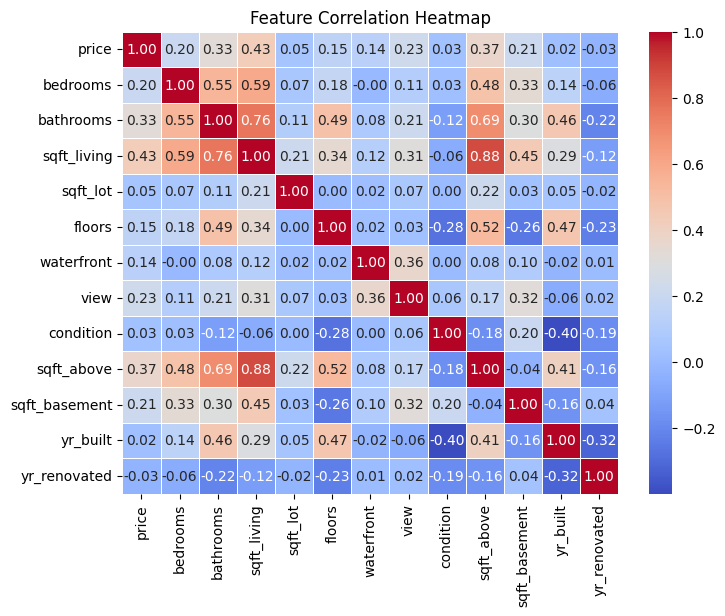

In [39]:
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.head())

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()





In [56]:
import scipy.stats as stats
z_score = stats.zscore(df)
threshold = 3
print("BEFORE REMOVING OUTLERS",df.shape)
outliers_df = df[(z_score>threshold).any(axis=1)]
df = df[(z_score <= threshold).all(axis=1)]
print("AFTER REMOVING OUTLIERS",df.shape)

BEFORE REMOVING OUTLERS (4600, 12)
AFTER REMOVING OUTLIERS (4244, 12)


In [57]:
outliers_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
56,491500.0,4.0,1.75,2190,125452,1.0,0,2,3,2190,0,1968
100,736500.0,4.0,2.50,3180,21904,2.0,0,3,3,3180,0,2000
107,1090000.0,4.0,2.50,4340,141570,2.5,0,0,3,4340,0,1992
118,1030000.0,5.0,2.75,3190,16920,1.0,0,3,3,1690,1500,1976


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
x = df.drop('price',axis=1)
y= df['price']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [67]:
print(f"'xtrain {x_train.shape}")
print(f"'xtest {x_test.shape}")

'xtrain (3183, 11)
'xtest (1061, 11)


In [68]:
models ={
    'KNN': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [77]:
for name, model in models.items(): # Use .items() method to iterate through key-value pairs
    print(name)
    print()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("MEAN SQUARED ERROR",mean_squared_error(y_test,y_pred))
    print("MEAN ABSOLUTE ERROR",mean_absolute_error(y_test,y_pred))
    print("R2 SCORE",r2_score(y_test,y_pred))

KNN

MEAN SQUARED ERROR 54270710864.73361
MEAN ABSOLUTE ERROR 155957.7490738805
R2 SCORE 0.2723497581494757
Linear Regression

MEAN SQUARED ERROR 41194072741.05998
MEAN ABSOLUTE ERROR 139590.9560074879
R2 SCORE 0.4476785633497429
Decision Tree

MEAN SQUARED ERROR 75901315492.44763
MEAN ABSOLUTE ERROR 189006.5343368247
R2 SCORE -0.017668825317377124
Random Forest

MEAN SQUARED ERROR 44379492486.11518
MEAN ABSOLUTE ERROR 141720.00971135718
R2 SCORE 0.4049691274320524


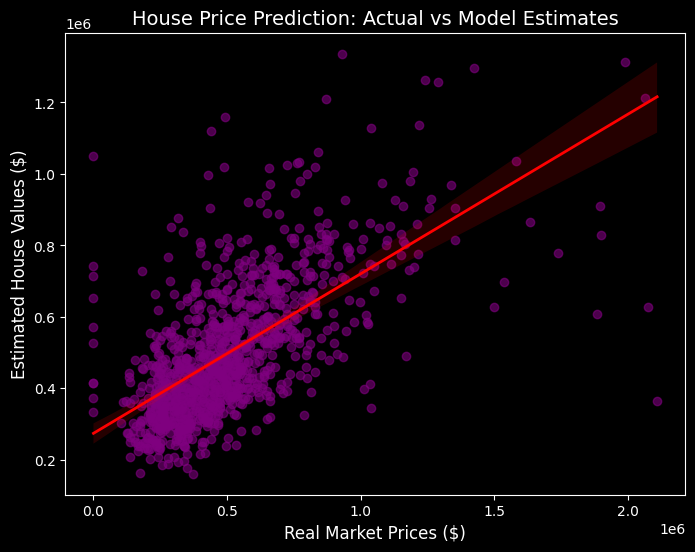

In [85]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.6, 'color': 'purple', 'marker': 'D'},
            line_kws={"color": "red", "linewidth": 2})
plt.xlabel("Real Market Prices ($)", fontsize=12)
plt.ylabel("Estimated House Values ($)", fontsize=12)
plt.title("House Price Prediction: Actual vs Model Estimates", fontsize=14)
plt.show()